In [1]:
import torch
import torch.nn

c:\Users\korea\OneDrive\바탕 화면\NLP study\my_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from mnist_classification.data_loader import load_mnist
from mnist_classification.models.cnn_model import ConvolutionalClassifier

In [4]:
model_fn = './model.pth'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['config'], d['model']

In [6]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict: ", float(torch.argmax(y_hat[i], dim=-1)))

In [7]:
def test(model, x, y, to_be_shown=True):
    model.eval()

    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))

        accuracy = correct_cnt / total_cnt
        print(f"Accuracy: {accuracy:.4f}")

        if to_be_shown:
            plot(x, y_hat)

In [8]:
from train import get_model

train_config, state_dict = load(model_fn, device)

model = get_model(train_config).to(device)
model.load_state_dict(state_dict)

print(model)

ConvolutionalClassifier(
  (blocks): Sequential(
    (0): ConvolutionBlock(
      (layers): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (4): ReLU()
        (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ConvolutionBlock(
      (layers): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (4): ReLU()
        (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): ConvolutionBlock(
      (layers): Seq

Accuracy: 1.0000


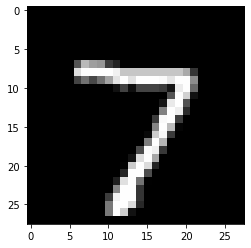

Predict:  7.0


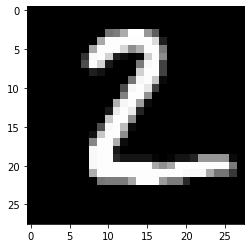

Predict:  2.0


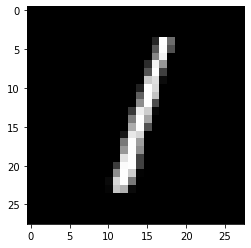

Predict:  1.0


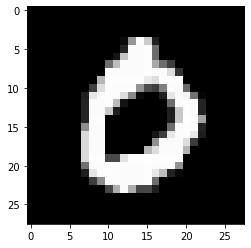

Predict:  0.0


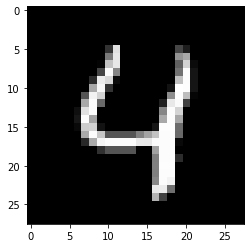

Predict:  4.0


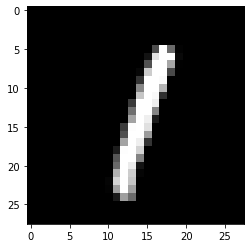

Predict:  1.0


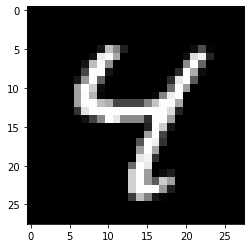

Predict:  4.0


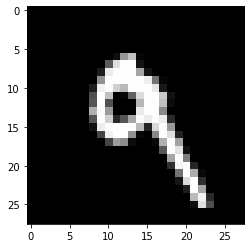

Predict:  9.0


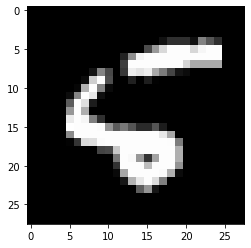

Predict:  5.0


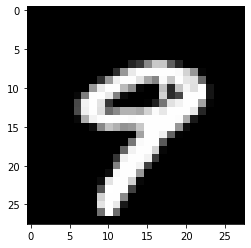

Predict:  9.0


In [9]:
x, y = load_mnist(is_train=False, flatten=True if train_config.model == 'fc' else False)

x, y = x.to(device), y.to(device)

test(model, x[:10], y[:10], to_be_shown=True)